# Fitness Class Attention

**Problem** : Many membors reserved a class but didn't attend.
**Requirement** : Predict new incoming booking whether membor will attend or not.

This notebook will show :
1. Some insights that probably be helpful.
2. Maching learning model to predict whether membor will join the class or not.

**Note for myself**
- Good data structure
- Good visualization

In [20]:
#import module
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

**Import raw data (local file)**

In [15]:
data = pd.read_csv('/Users/User/Documents/GitHub/project/Fitness Attention Prediction/fitness_class_2212.csv')

-----------------------------------------------------------------------------

**Preprocessing**

In [22]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB
None


In [25]:
data.days_before.value_counts()

10         293
2          199
8          194
12         178
14         172
4          154
6           70
7           38
3           31
5           30
11          26
13          25
15          24
9           24
1            9
10 days      6
14 days      3
12 days      3
6 days       3
4 days       3
16           3
17           3
20           1
2 days       1
5 days       1
7 days       1
8 days       1
1 days       1
3 days       1
13 days      1
29           1
Name: days_before, dtype: int64

In [28]:
data['days_before'] = data.days_before.str.strip(' days').astype('int')

In [31]:
data.day_of_week.value_counts()

Fri          279
Thu          241
Mon          218
Sun          213
Sat          202
Tue          195
Wed           81
Wednesday     35
Fri.          26
Monday        10
Name: day_of_week, dtype: int64

In [35]:
mapping = {'Fri.':'Fri', 'Wednesday':'Wed', 'Monday':'Mon'}
data['day_of_week'] = data.day_of_week.replace(mapping, regex = True)

In [37]:
data.day_of_week.value_counts()

Fri    305
Thu    241
Mon    228
Sun    213
Sat    202
Tue    195
Wed    116
Name: day_of_week, dtype: int64

In [42]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
data.day_of_week = pd.Categorical(data.day_of_week, categories = days)

In [43]:
data

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0


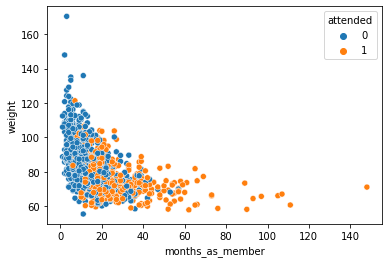

In [21]:
sns.scatterplot(data = data, x = 'months_as_member', y = 'weight', hue = 'attended')
plt.show()

**INSIGHT :** Membors who have been in memborship longer and has less weight tend to attend their booked class more often, **significantly**.